# Analisi ospedalizzati


In [18]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax,auto_grid_shape

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [19]:
# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

# grid shape
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

## Lettura dati

In [20]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
posti_ti_covid=pkl.load(infile)
posti_ti_antecovid=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 236
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-10-16T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [21]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

## Grafici Nazionali

## Trend del totale dei positivi vs ospedalizzati di vario genere

### Italia

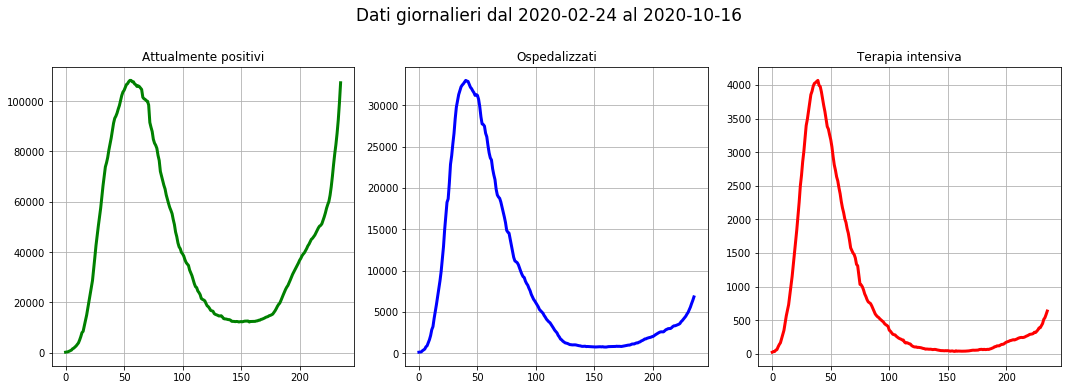

In [22]:
fig,ax=plt.subplots(1,3,sharey=False,figsize=(15,5))
fig.suptitle('Dati giornalieri dal %s al %s'%(giorni[0][0:10],giorni[-1][0:10]), y=1.1,fontsize=17)
fig.tight_layout(pad=2.0)

ax[0].plot(day_counter,trend['totale_positivi']['Italia'],
         'g-', linewidth=3,
         label='Attualmente positivi')
ax[0].set_title('Attualmente positivi')
ax[0].grid()

ax[1].plot(day_counter,trend['totale_ospedalizzati']['Italia'],
         'b-',linewidth=3,
         label='Ospedalizzati')
ax[1].set_title('Ospedalizzati')
ax[1].grid()

ax[2].plot(day_counter,trend['terapia_intensiva']['Italia'],
         'r-',linewidth=3,
         label='Terapia intensiva')
#ax[2].axhline(posti_ti_covid['Italia'],c='k',ls='-',label='Post-COVID')
#ax[2].axhline(posti_ti_antecovid['Italia'],c='k',ls='--',label='Post-COVID')
ax[2].set_title('Terapia intensiva')
ax[2].grid()

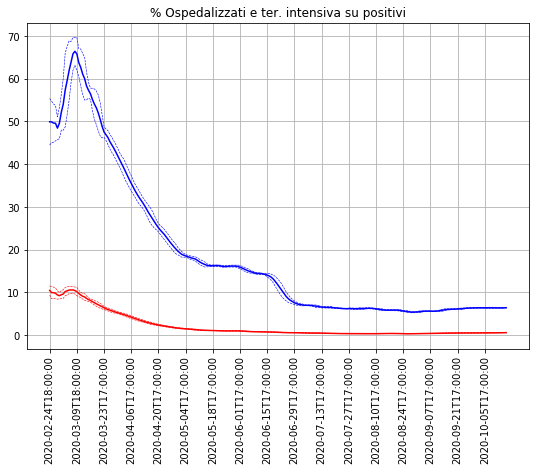

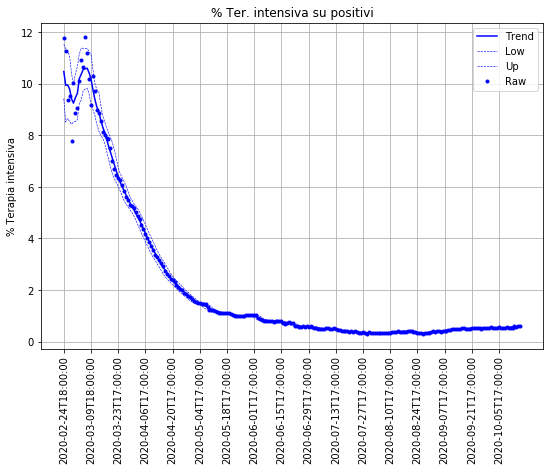

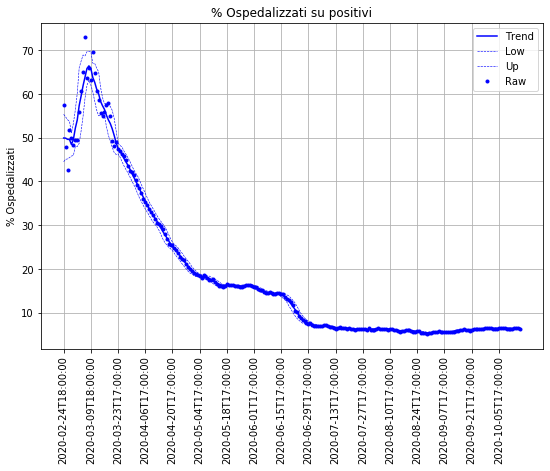

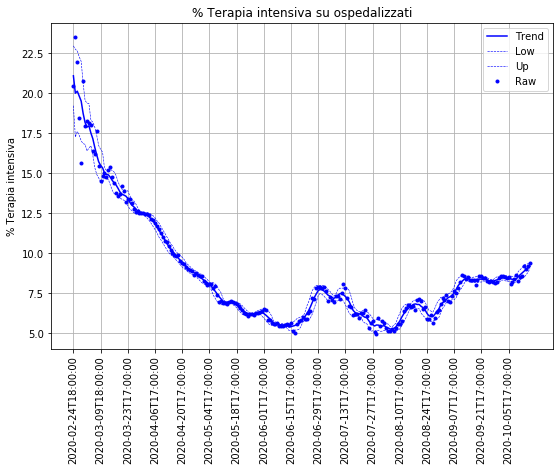

In [23]:
# Terapia intensiva e ospedalizzati su positivi
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation',color='r')
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            100*trend['totale_ospedalizzati']['Italia']/trend['totale_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation',color='b')

ax.set_title('% Ospedalizzati e ter. intensiva su positivi')
ax.set_xticks(list(range(0,len(day_counter),14)))
ax.set_xticklabels(giorni[list(range(0,len(day_counter),14))],rotation=90)
ax.grid()





# Terapia intensiva su positivi
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('% Ter. intensiva su positivi')
ax.set_xticks(list(range(0,len(day_counter),14)))
ax.set_xticklabels(giorni[list(range(0,len(day_counter),14))],rotation=90)
ax.set_ylabel('% Terapia intensiva')
# stampo anche a punti il dato raw
ax.plot(100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.grid()




# ospedalizzati su positivi
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            100*trend['totale_ospedalizzati']['Italia']/trend['totale_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('% Ospedalizzati su positivi')
ax.set_xticks(list(range(0,len(day_counter),14)))
ax.set_xticklabels(giorni[list(range(0,len(day_counter),14))],rotation=90)
ax.set_ylabel('% Ospedalizzati')
# stampo anche a punti il dato raw
ax.plot(100*trend['totale_ospedalizzati']['Italia']/trend['totale_positivi']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.grid()




# terapia intensiva su ospedalizzati
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            100*trend['terapia_intensiva']['Italia']/trend['totale_ospedalizzati']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('% Terapia intensiva su ospedalizzati')
ax.set_xticks(list(range(0,len(day_counter),14)))
ax.set_xticklabels(giorni[list(range(0,len(day_counter),14))],rotation=90)
ax.set_ylabel('% Terapia intensiva')
# stampo anche a punti il dato raw
ax.plot(100*trend['terapia_intensiva']['Italia']/trend['totale_ospedalizzati']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.grid()


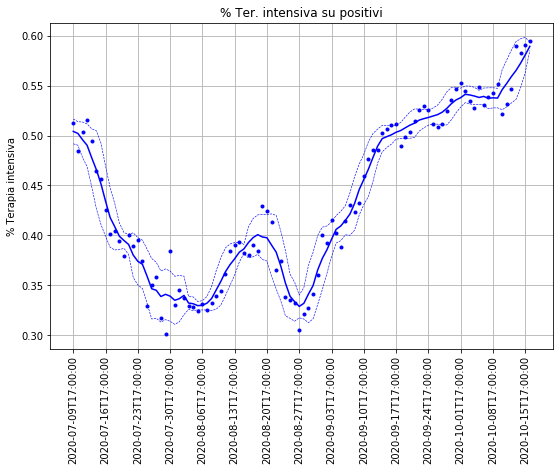

In [24]:
last_days=100

# Terapia intensiva su positivi
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter[-last_days:],
            (100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'])[-last_days:],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('% Ter. intensiva su positivi')
ax.set_xticks(list(range(day_counter[-last_days],day_counter[-1],7)))
ax.set_xticklabels(giorni[list(range(day_counter[-last_days],day_counter[-1],7))],rotation=90)
ax.set_ylabel('% Terapia intensiva')
# stampo anche a punti il dato raw
ax.plot(day_counter[-last_days:],(100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'])[-last_days:],'b.')
#ax.legend(['Trend','Low','Up','Raw'])
ax.grid()

### Terapia intensiva vs totale infetti

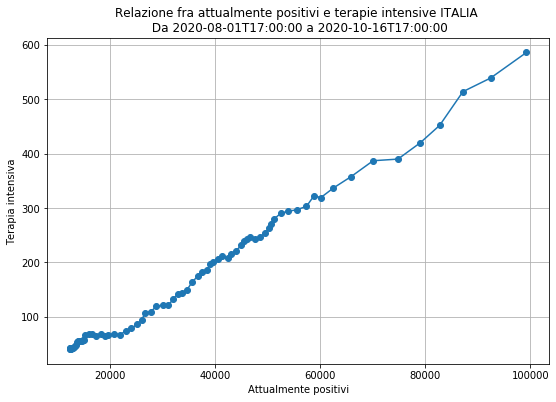

Media del rapporto TI/INFETTI
0.004875532360716165


In [58]:
first_day=159
last_day=-1

fig,ax=plt.subplots(1,figsize=figsize_single)
plt.plot(trend['totale_positivi']['Italia'][first_day:last_day],trend['terapia_intensiva']['Italia'][first_day:last_day],'o-')
plt.title('Relazione fra attualmente positivi e terapie intensive ITALIA \n Da %s a %s'%(giorni[first_day],giorni[last_day]))
plt.xlabel('Attualmente positivi')
plt.ylabel('Terapia intensiva')
plt.grid()
plt.show()

print('Media del rapporto TI/INFETTI')
print(np.sum(trend['terapia_intensiva']['Italia'][first_day:last_day])/np.sum(trend['totale_positivi']['Italia'][first_day:last_day]))

## Grafici per regione

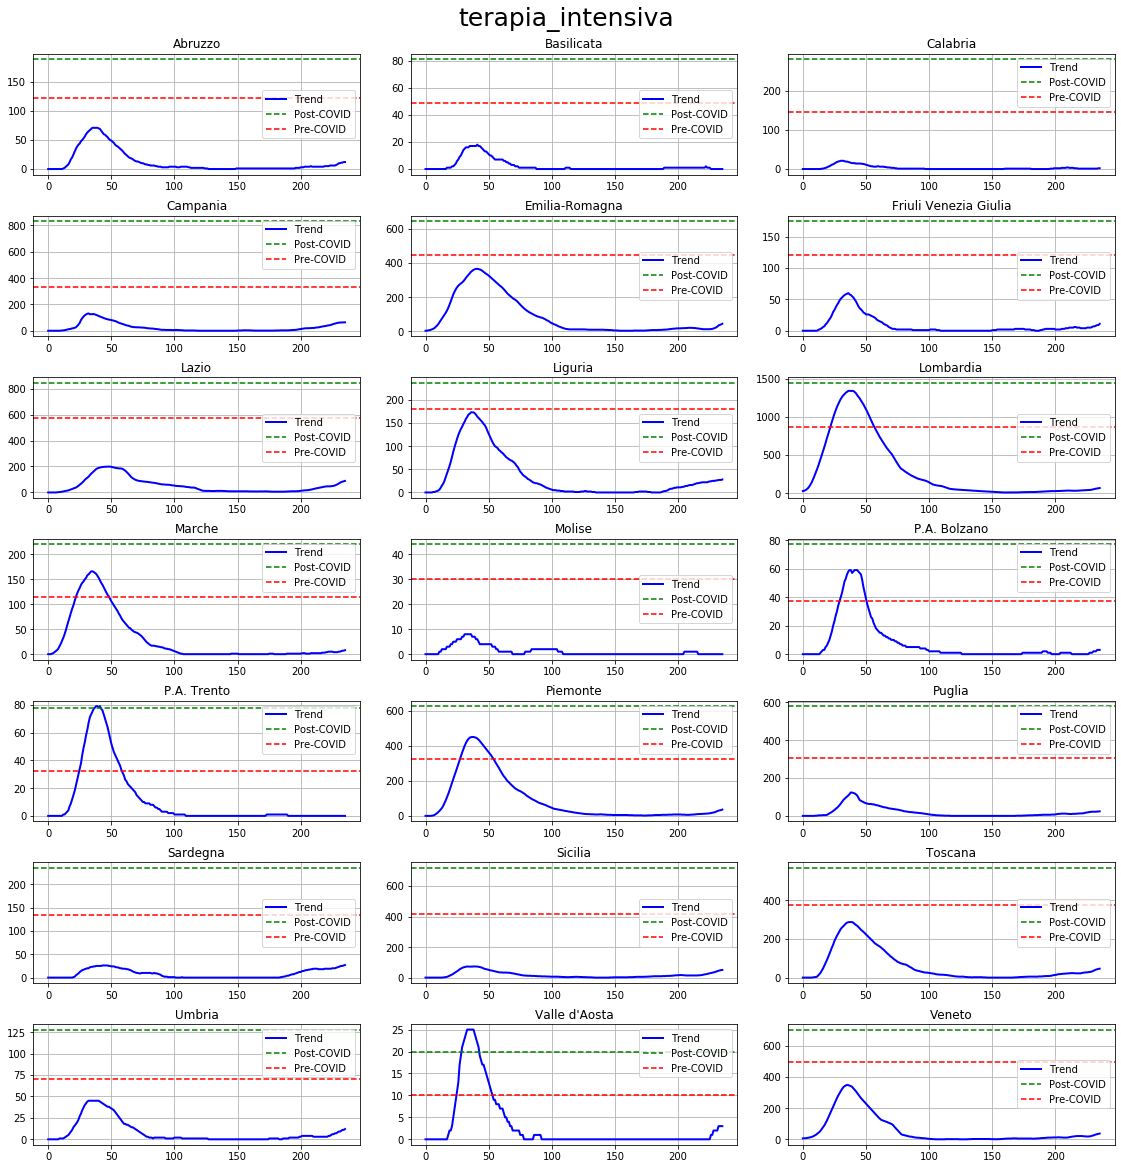

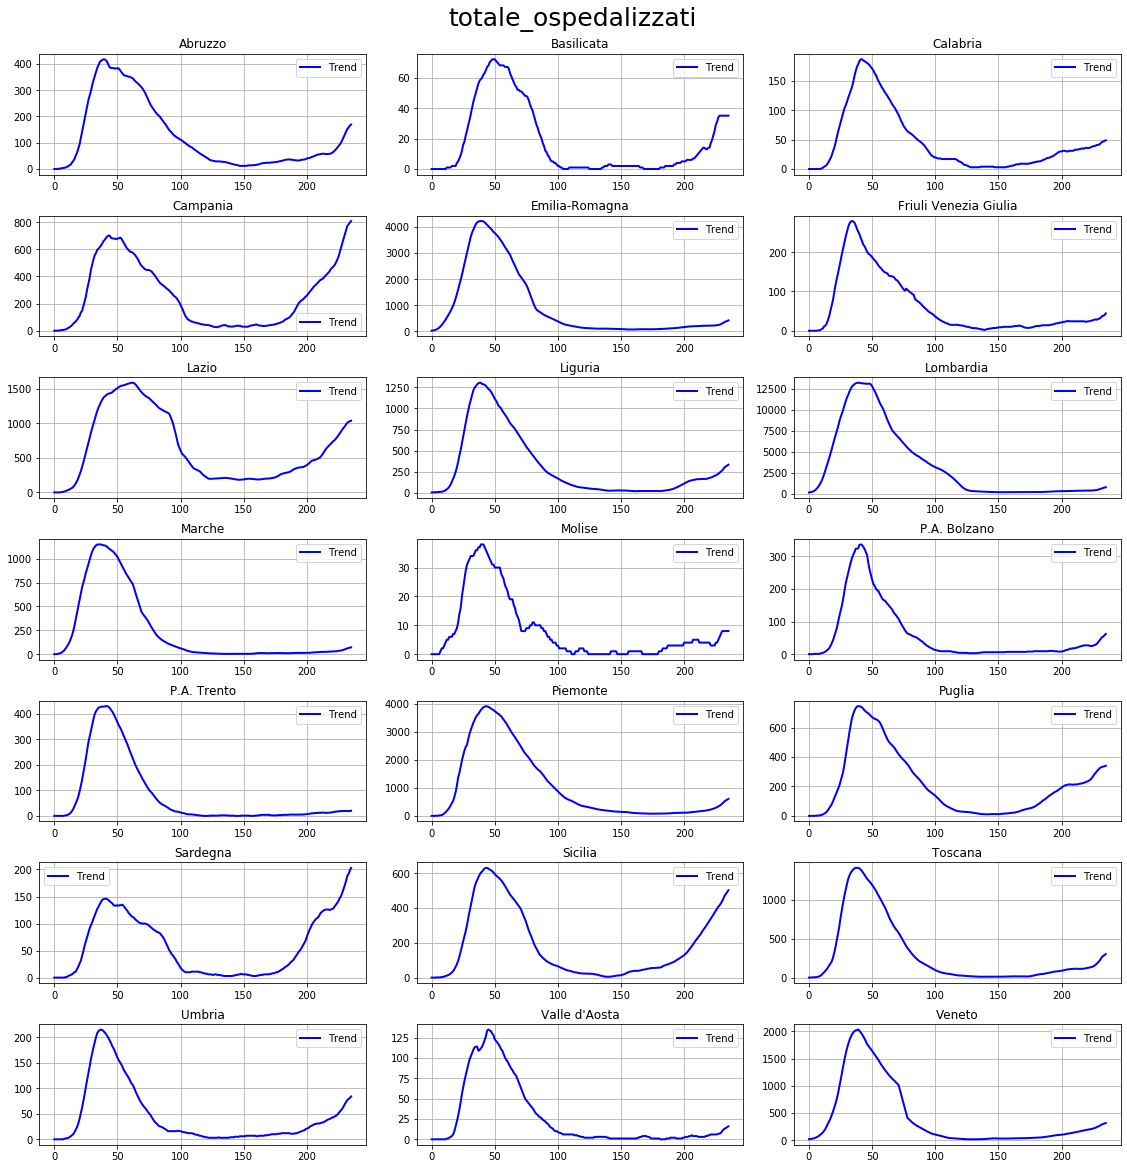

In [25]:
indicatori_selected=['terapia_intensiva',
                    'totale_ospedalizzati']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        #ax[grid_seq[i]].plot(day_counter,trend[indicatore][regione],
        #                     'b-',linewidth=0.6,label='Reg')
        ax[grid_seq[i]].plot(day_counter,moving_function_rev1(trend[indicatore][regione],np.mean,3,3),
                             'b-',linewidth=2,label='Trend')
        # se analizzo la ti plotto una linea con la max capacità regionale
        if indicatore=='terapia_intensiva':
            ax[grid_seq[i]].axhline(posti_ti_covid[regione],c='g',ls='--',label='Post-COVID')
            ax[grid_seq[i]].axhline(posti_ti_antecovid[regione],c='r',ls='--',label='Pre-COVID')
            
            
        ax[grid_seq[i]].set_title(regione)
        ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
        
    fig.savefig('PIC_%s.JPG'%indicatore)

## Saturazione terapia intensiva

Posti **COVID**

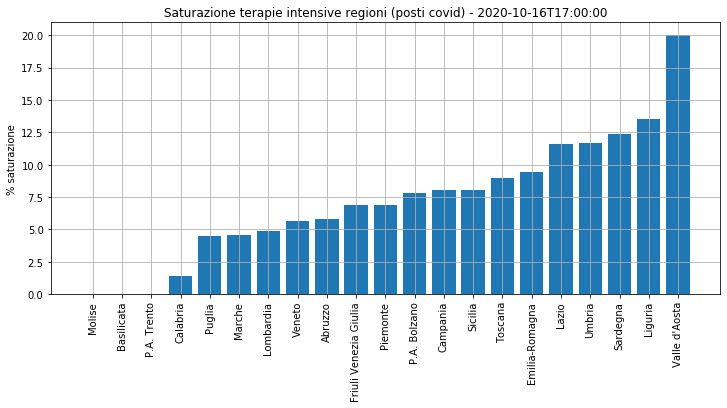

In [47]:
valori=np.array([100*trend['terapia_intensiva'][r][-1]/posti_ti_covid[r] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Saturazione terapie intensive regioni (posti covid) - %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('% saturazione')
plt.grid()
plt.show()


Posti **pre-COVID**

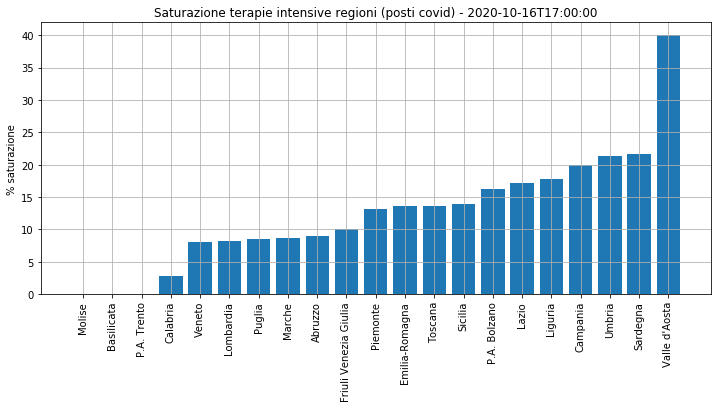

In [48]:
valori=np.array([100*trend['terapia_intensiva'][r][-1]/posti_ti_antecovid[r] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Saturazione terapie intensive regioni (posti covid) - %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('% saturazione')
plt.grid()
plt.show()


## Distribuzione ospedalizzati nel tempo

In [26]:
categories=['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare']
values=[trend[c]['Italia'] for c in categories]
values=np.array(values)

values.shape

(3, 236)

### Trend scatter plot

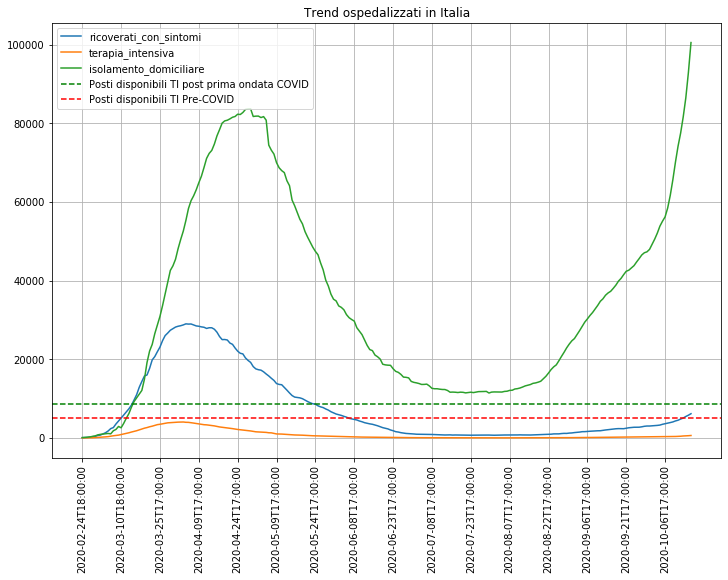

In [27]:
plt.figure(figsize=(12,8))
for indicatore in categories:
    plt.plot(day_counter,trend[indicatore]['Italia'],'-',label=indicatore)

plt.grid()
plt.title('Trend ospedalizzati in Italia')
plt.xticks(list(range(0,len(giorni),15)),giorni[list(range(0,len(giorni),15))],rotation=90)

#plt.axvline(x=lockdown['id_giorno'],c='r', label='Lockdown',linewidth=4,ls='--')
#plt.axvline(x=scuole_chiuse['id_giorno'],c='c', label='Scuole chiuse',linewidth=4,ls='--')
#plt.axvline(x=fase_2['id_giorno'],c='g', label='Fase 2',linewidth=4,ls='--')

plt.axhline(posti_ti_covid['Italia'],c='g',ls='--',label='Posti disponibili TI post prima ondata COVID')
plt.axhline(posti_ti_antecovid['Italia'],c='r',ls='--',label='Posti disponibili TI Pre-COVID')

plt.legend()

### Pie charts

In [28]:
giorni_bar=np.arange(0,len(day_counter),14)

#p1 = plt.bar(ind, menMeans, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,
#             bottom=menMeans, yerr=womenStd)
